# Speed distribution

No reference for this notebook, just working through aspects of lap data. Here I'm focusing on the distribution of
speeds across a driver's fastest lap in qualifying.

In [1]:
# Load packages

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

import fastf1 as ff1

In [2]:
# Define commonly-used variables

year = 2024
race = 'Barcelona'
ses = 'Q'
driver = 'NOR'
colormap = mpl.cm.plasma

In [3]:
# Load session data

session = ff1.get_session(year, race, ses)
weekend = session.event
session.load()
lap = session.laps.pick_drivers(driver).pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

req         WARNING 	DEFAULT CACHE ENABLED! (2.63 GB) /Users/mjbernha/Library/Caches/fastf1
core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '44', '63', '16', '55', '10', '11', '31', '81', '14', '77', '27', '18', '24', '20', '22', '3', '23', '2']


In [4]:
lap.telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2024-06-22 14:59:40.487,0 days 01:13:07.570000,,105.196667,0 days 00:00:00,10562.041712,299.283334,8,100.0,False,14,interpolation,0.011375,0.000002,OnTrack,1376.422486,-250.736519,1707.038870
3,2024-06-22 14:59:40.693,0 days 01:13:07.776000,,105.196667,0 days 00:00:00.206000,10635.000000,301.000000,8,100.0,False,14,car,17.242778,0.003708,OnTrack,1242.121526,-461.188381,1707.864799
4,2024-06-22 14:59:40.760,0 days 01:13:07.843000,,105.196667,0 days 00:00:00.273000,10662.470026,301.670001,8,100.0,False,14,pos,22.866834,0.004918,OnTrack,1211.000000,-510.000000,1708.000000
5,2024-06-22 14:59:40.893,0 days 01:13:07.976000,31,105.196667,0 days 00:00:00.406000,10717.000000,303.000000,8,100.0,False,14,car,34.076111,0.007328,OnTrack,1167.481164,-578.344915,1708.074378
6,2024-06-22 14:59:41.052,0 days 01:13:08.135000,31,105.152500,0 days 00:00:00.565000,10765.000000,306.000000,8,100.0,False,14,car,47.591111,0.010235,OnTrack,1122.923942,-648.406237,1708.001789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,2024-06-22 15:00:51.361,0 days 01:14:18.444000,10,800.209447,0 days 00:01:10.874000,11482.084983,286.917500,7,100.0,False,14,pos,4596.956232,0.988634,OnTrack,1535.000000,-3.000000,1708.000000
546,2024-06-22 15:00:51.372,0 days 01:14:18.455000,10,799.806111,0 days 00:01:10.885000,11485.000000,287.000000,7,100.0,False,14,car,4597.840833,0.988824,OnTrack,1529.757809,-11.159744,1707.972268
547,2024-06-22 15:00:51.740,0 days 01:14:18.823000,10,784.575000,0 days 00:01:11.253000,11262.527273,291.181818,7,100.0,False,14,pos,4627.671867,0.995239,OnTrack,1431.000000,-165.000000,1707.000000
548,2024-06-22 15:00:51.812,0 days 01:14:18.895000,10,781.595000,0 days 00:01:11.325000,11219.000000,292.000000,7,100.0,False,14,car,4633.529722,0.996499,OnTrack,1404.389945,-206.836040,1706.945298


{'bodies': [<matplotlib.collections.FillBetweenPolyCollection at 0x13af59160>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x13a827920>,
 'cmins': <matplotlib.collections.LineCollection at 0x13a751640>,
 'cbars': <matplotlib.collections.LineCollection at 0x13cef1dc0>}

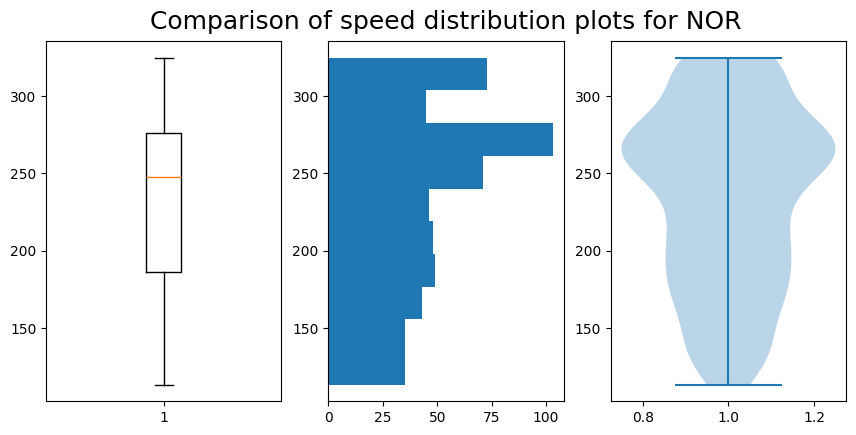

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4.5))
fig.suptitle(f'Comparison of speed distribution plots for {driver}', size=18, y=0.97)

plt.subplots_adjust(
  left=0.1,
  right=0.9,
  top=0.9,
  bottom=0.1
)

ax1.boxplot(
  x=lap.telemetry['Speed']
)

ax2.hist(
  x=lap.telemetry['Speed'],
  orientation='horizontal'
)

ax3.violinplot(
  lap.telemetry['Speed']
)

---

This is the end of the notebook.